# Get the Data

In [72]:
import pandas as pd

In [73]:
df = pd.read_csv('Housing.csv')

In [74]:
from sklearn.model_selection import train_test_split


train_data, test_data = train_test_split(df, test_size=0.20, random_state=25)






# Vizualize data

In [75]:
# No missing values
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 436 entries, 296 to 132
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             436 non-null    int64 
 1   area              436 non-null    int64 
 2   bedrooms          436 non-null    int64 
 3   bathrooms         436 non-null    int64 
 4   stories           436 non-null    int64 
 5   mainroad          436 non-null    object
 6   guestroom         436 non-null    object
 7   basement          436 non-null    object
 8   hotwaterheating   436 non-null    object
 9   airconditioning   436 non-null    object
 10  parking           436 non-null    int64 
 11  prefarea          436 non-null    object
 12  furnishingstatus  436 non-null    object
dtypes: int64(6), object(7)
memory usage: 47.7+ KB


In [76]:
train_data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
296,4200000,4600,3,2,2,yes,no,no,no,yes,1,no,semi-furnished
150,5600000,5136,3,1,2,yes,yes,yes,no,yes,0,yes,unfurnished
195,4970000,4410,4,3,2,yes,no,yes,no,no,2,no,semi-furnished
158,5495000,7980,3,1,1,yes,no,no,no,no,2,no,semi-furnished
510,2520000,2880,3,1,1,no,no,no,no,no,0,no,unfurnished


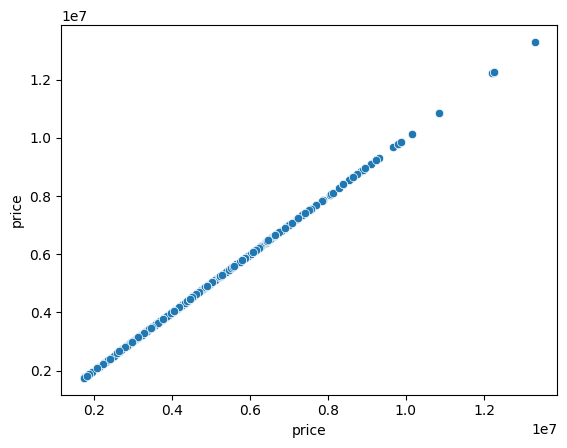

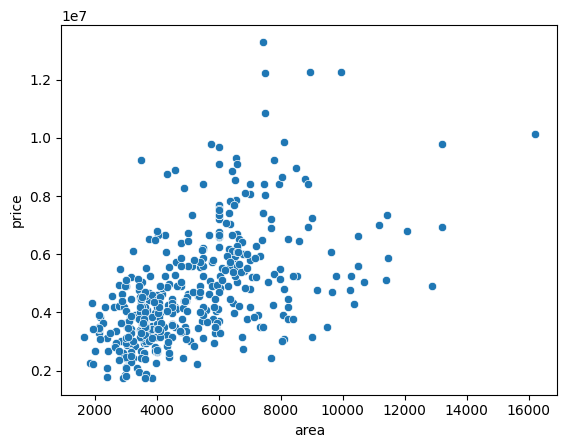

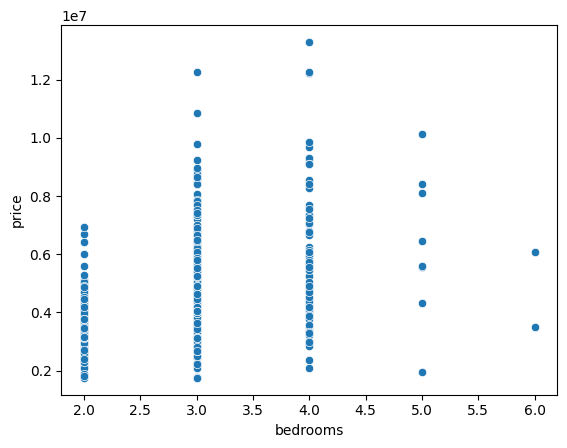

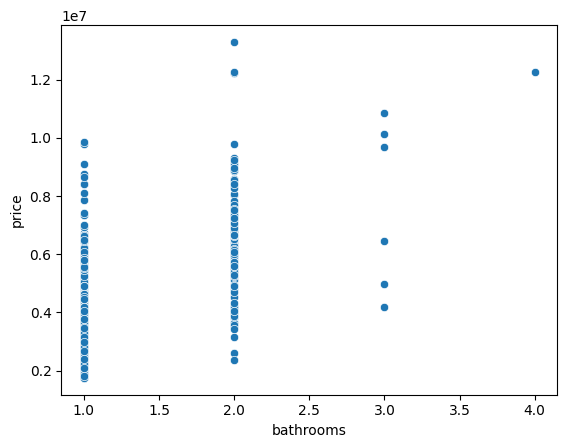

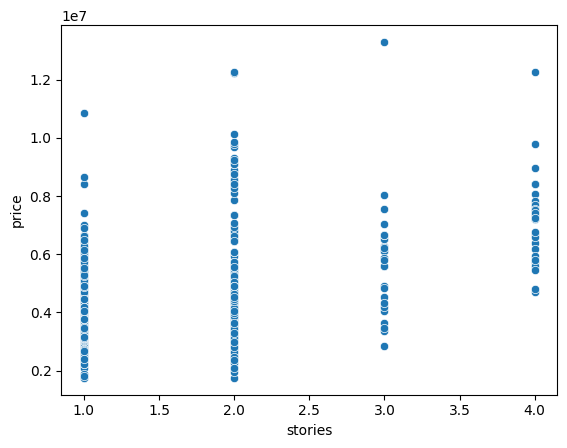

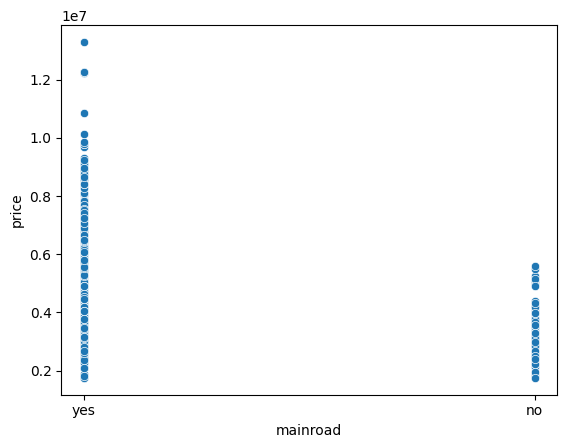

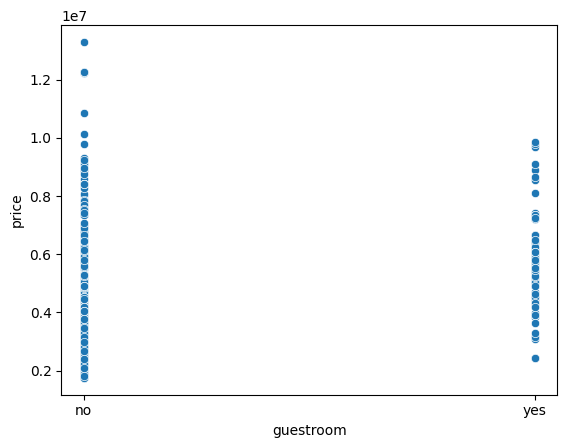

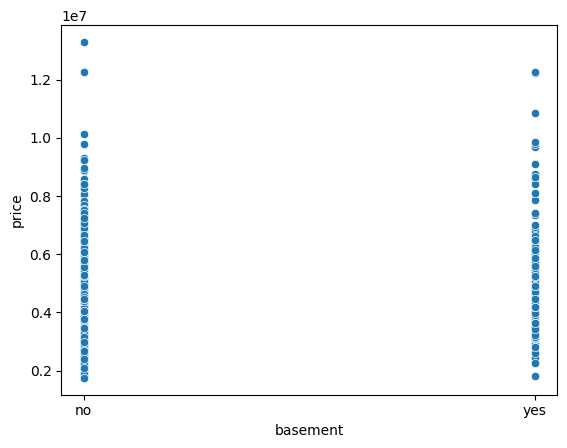

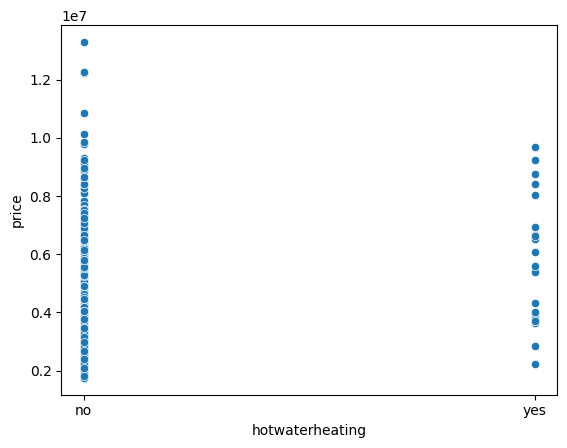

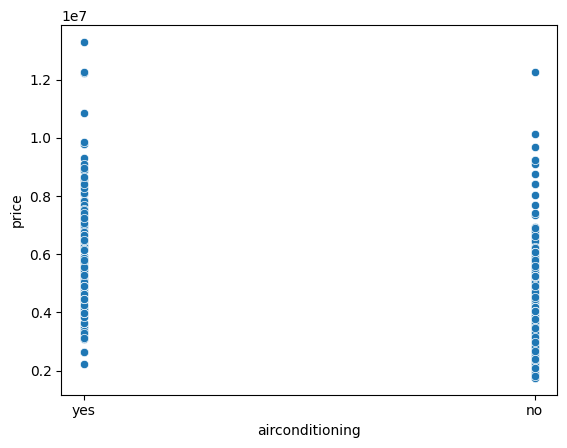

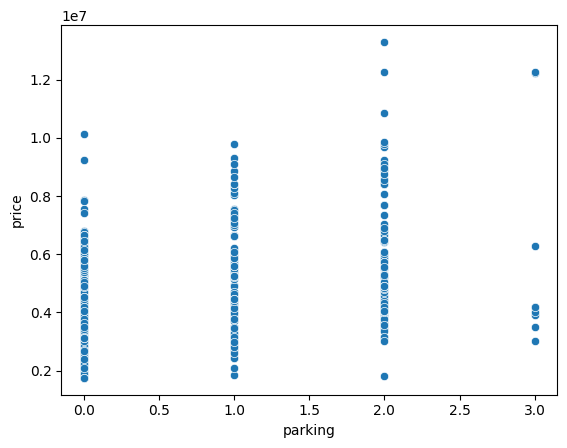

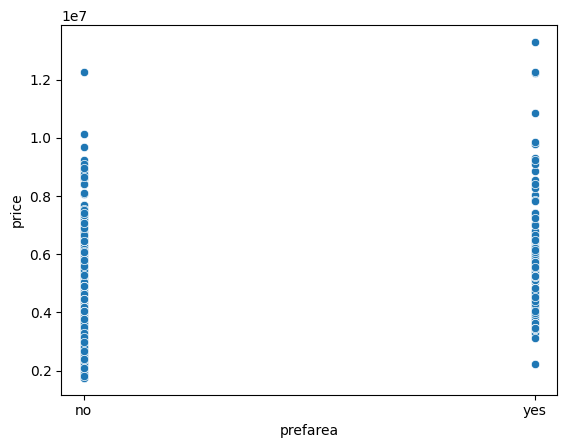

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns

for i in range(len(train_data.columns) - 1):
  x_label = train_data.columns[i]
  y_label = train_data['price']
  sns.scatterplot(x=x_label, y=y_label, data=train_data)
  plt.show()

# Data Preprocesing

In [78]:
# Will need to take care of the categorical well
# Need to encode some columns as well

from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler


num_pipeline = Pipeline([
        ("scaler", StandardScaler())
    ])

In [79]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

categorical_pipeline = Pipeline([
    ("original_encoder", OrdinalEncoder()),
    ("cat_encoder", OneHotEncoder())
])



In [80]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 436 entries, 296 to 132
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             436 non-null    int64 
 1   area              436 non-null    int64 
 2   bedrooms          436 non-null    int64 
 3   bathrooms         436 non-null    int64 
 4   stories           436 non-null    int64 
 5   mainroad          436 non-null    object
 6   guestroom         436 non-null    object
 7   basement          436 non-null    object
 8   hotwaterheating   436 non-null    object
 9   airconditioning   436 non-null    object
 10  parking           436 non-null    int64 
 11  prefarea          436 non-null    object
 12  furnishingstatus  436 non-null    object
dtypes: int64(6), object(7)
memory usage: 47.7+ KB


In [81]:

from sklearn.compose import ColumnTransformer

num_attribs = ["area", "bedrooms", "bathrooms", "stories", "parking"]
cat_attribs = ["mainroad", "guestroom", "basement", "hotwaterheating", "airconditioning", "airconditioning", "prefarea", "furnishingstatus"]

preprocess_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", categorical_pipeline, cat_attribs),
    ])

In [82]:
X_train = preprocess_pipeline.fit_transform(train_data)
X_train

array([[-0.26440419,  0.01862923,  1.43878211, ...,  0.        ,
         1.        ,  0.        ],
       [-0.01756526,  0.01862923, -0.57828863, ...,  0.        ,
         0.        ,  1.        ],
       [-0.35190307,  1.37235318,  3.45585285, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [-0.37861325,  1.37235318, -0.57828863, ...,  0.        ,
         0.        ,  1.        ],
       [-0.3841395 ,  0.01862923, -0.57828863, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.01190804,  0.01862923, -0.57828863, ...,  0.        ,
         1.        ,  0.        ]])

In [83]:
y_train = train_data["price"]

In [84]:
y_train

296    4200000
150    5600000
195    4970000
158    5495000
510    2520000
        ...   
317    4060000
143    5600000
474    2975000
318    4060000
132    5810000
Name: price, Length: 436, dtype: int64

# Training and Testing - Linear Regression

In [85]:
import numpy as np
def reg_metrics(y_test, y_pred, X_train):
    from sklearn.metrics import mean_squared_error, r2_score 

    rmse = np.sqrt(mean_squared_error(y_test,y_pred))
    r2 = r2_score(y_test,y_pred)

    # Scikit-learn doesn't have adjusted r-square, hence custom code
    n = y_pred.shape[0]
    k = X_train.shape[1]
    adj_r_sq = 1 - (1 - r2)*(n-1)/(n-1-k)

    print("RMSE: ", rmse)
    print("r2: ", r2, adj_r_sq)
    print("adj_r_sq: ", adj_r_sq)



In [86]:
X_test = preprocess_pipeline.fit_transform(test_data)
y_test = test_data["price"]


In [87]:
from sklearn.linear_model import LinearRegression


price_predictor = LinearRegression()
price_predictor.fit(X_train, y_train)

train_score = price_predictor.score(X_train, y_train)
test_score = price_predictor.score(X_test, y_test)

print("Train score: ", train_score)
print("Test score: ", test_score)

Train score:  0.685397191957754
Test score:  0.6537207314890658


In [88]:
y_predictions = price_predictor.predict(X_test)

In [89]:
reg_metrics(y_test, y_predictions, X_train)

RMSE:  1031615.6032262723
r2:  0.6537207314890658 0.5651376628002223
adj_r_sq:  0.5651376628002223


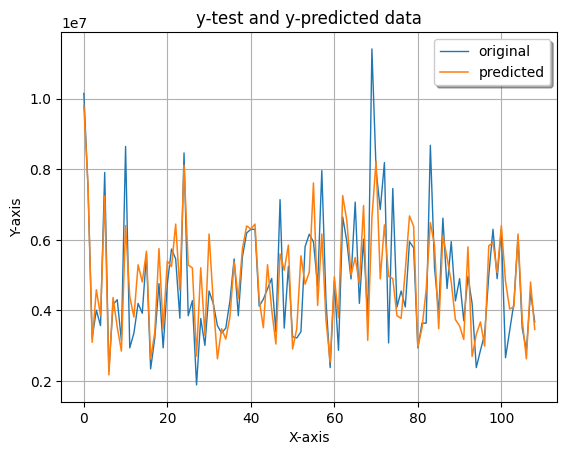

In [90]:
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, linewidth=1, label="original")
plt.plot(x_ax, y_predictions, linewidth=1.1, label="predicted")
plt.title("y-test and y-predicted data")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show() 


# Training and Testing - DecisionTreeRegressor

In [91]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(X_train, y_train)

tree_reg.score(X_train, y_train)



0.9992270183065929

In [92]:
tree_reg_predictions = tree_reg.predict(X_test)

In [93]:
reg_metrics(y_test, tree_reg_predictions, X_train)

RMSE:  1510663.2353209825
r2:  0.257449479280881 0.0674946949108739
adj_r_sq:  0.0674946949108739


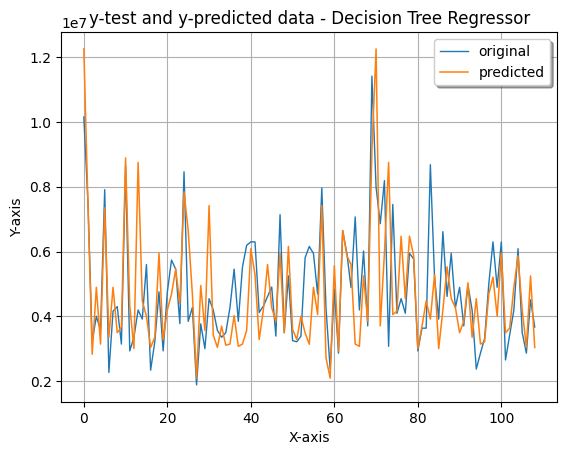

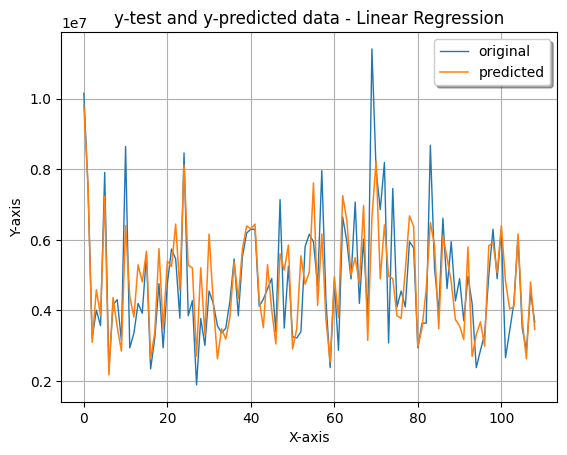

In [94]:
# Comparing the two models side-by-side

x_ax = range(len(y_test))
plt.plot(x_ax, y_test, linewidth=1, label="original")
plt.plot(x_ax, tree_reg_predictions, linewidth=1.1, label="predicted")
plt.title("y-test and y-predicted data - Decision Tree Regressor")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()


x_ax = range(len(y_test))
plt.plot(x_ax, y_test, linewidth=1, label="original")
plt.plot(x_ax, y_predictions, linewidth=1.1, label="predicted")
plt.title("y-test and y-predicted data - Linear Regression")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show() 
